Jamison Hunter

August 11, 2023

# Chicago Crime Data Analysis

In [1]:
# Imports
import os
import glob
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [3]:
# get list of files from folder
crime_files = sorted(glob.glob("Data/Chicago/"+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=7) for f in crime_files])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 6
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    161 non-null    int64  
 1   Date                  161 non-null    object 
 2   Primary Type          161 non-null    object 
 3   Description           161 non-null    object 
 4   Location Description  161 non-null    object 
 5   Arrest                161 non-null    bool   
 6   Domestic              161 non-null    bool   
 7   Beat                  161 non-null    int64  
 8   District              161 non-null    float64
 9   Ward                  148 non-null    float64
 10  Latitude              148 non-null    float64
 11  Longitude             148 non-null    float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 14.2+ KB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
2,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
3,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
4,1315701,01/01/2001 01:00:00 PM,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.0,NaN,41.866421,-87.725046


In [4]:
path_1 = r"Data/Chicago/Chicago-Crime_2001.csv"
path_2 = r"Data/Chicago/Chicago-Crime_2002.csv"
path_3 = r"Data/Chicago/Chicago-Crime_2003.csv"
path_4 = r"Data/Chicago/Chicago-Crime_2004.csv"
path_5 = r"Data/Chicago/Chicago-Crime_2005.csv"
path_6 = r"Data/Chicago/Chicago-Crime_2006.csv"
path_7 = r"Data/Chicago/Chicago-Crime_2007.csv"
path_8 = r"Data/Chicago/Chicago-Crime_2008.csv"
path_9 = r"Data/Chicago/Chicago-Crime_2009.csv"
path_10 = r"Data/Chicago/Chicago-Crime_2010.csv"
path_11 = r"Data/Chicago/Chicago-Crime_2011.csv"
path_12 = r"Data/Chicago/Chicago-Crime_2012.csv"
path_13 = r"Data/Chicago/Chicago-Crime_2013.csv"
path_14 = r"Data/Chicago/Chicago-Crime_2014.csv"
path_15 = r"Data/Chicago/Chicago-Crime_2015.csv"
path_16 = r"Data/Chicago/Chicago-Crime_2016.csv"
path_17 = r"Data/Chicago/Chicago-Crime_2017.csv"
path_18 = r"Data/Chicago/Chicago-Crime_2018.csv"
path_19 = r"Data/Chicago/Chicago-Crime_2019.csv"
path_20 = r"Data/Chicago/Chicago-Crime_2020.csv"
path_21 = r"Data/Chicago/Chicago-Crime_2021.csv"
path_22 = r"Data/Chicago/Chicago-Crime_2022.csv"
path_23 = r"Data/Chicago/Chicago-Crime_2023.csv"

In [5]:
df_1 = pd.read_csv(path_1)
df_2 = pd.read_csv(path_2)
df_3 = pd.read_csv(path_3)
df_4 = pd.read_csv(path_4)
df_5 = pd.read_csv(path_5)
df_6 = pd.read_csv(path_6)
df_7 = pd.read_csv(path_7)
df_8 = pd.read_csv(path_8)
df_9 = pd.read_csv(path_9)
df_10 = pd.read_csv(path_10)
df_11 = pd.read_csv(path_11)
df_12 = pd.read_csv(path_12)
df_13 = pd.read_csv(path_13)
df_14 = pd.read_csv(path_14)
df_15 = pd.read_csv(path_15)
df_16 = pd.read_csv(path_16)
df_17 = pd.read_csv(path_17)
df_18 = pd.read_csv(path_18)
df_19 = pd.read_csv(path_19)
df_20 = pd.read_csv(path_20)
df_21 = pd.read_csv(path_21)
df_22 = pd.read_csv(path_22)
df_23 = pd.read_csv(path_23)
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_8, df_9, df_10, df_11, 
               df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23])

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8288872 entries, 0 to 149053
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 711.4+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
2,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
3,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
4,1315701,01/01/2001 01:00:00 PM,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.0,NaN,41.866421,-87.725046


In [7]:
df["Primary Type"].unique()

array(['OTHER OFFENSE', 'CRIMINAL DAMAGE', 'THEFT', 'BATTERY',
       'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'MOTOR VEHICLE THEFT',
       'WEAPONS VIOLATION', 'ASSAULT', 'BURGLARY',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'LIQUOR LAW VIOLATION',
       'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [8]:
df["District"].unique()

array([14., 10., 19.,  9., 11., 16., 22.,  8.,  6.,  5., 15., 25.,  2.,
       24., 17., 18.,  4., 12.,  3.,  7., 20.,  1., 31., 21., nan])

# Comparing Police Districts

I want to know which police distric has the most crime and which has the least crime overall.

Text(0.5, 0, 'Number of Crimes')

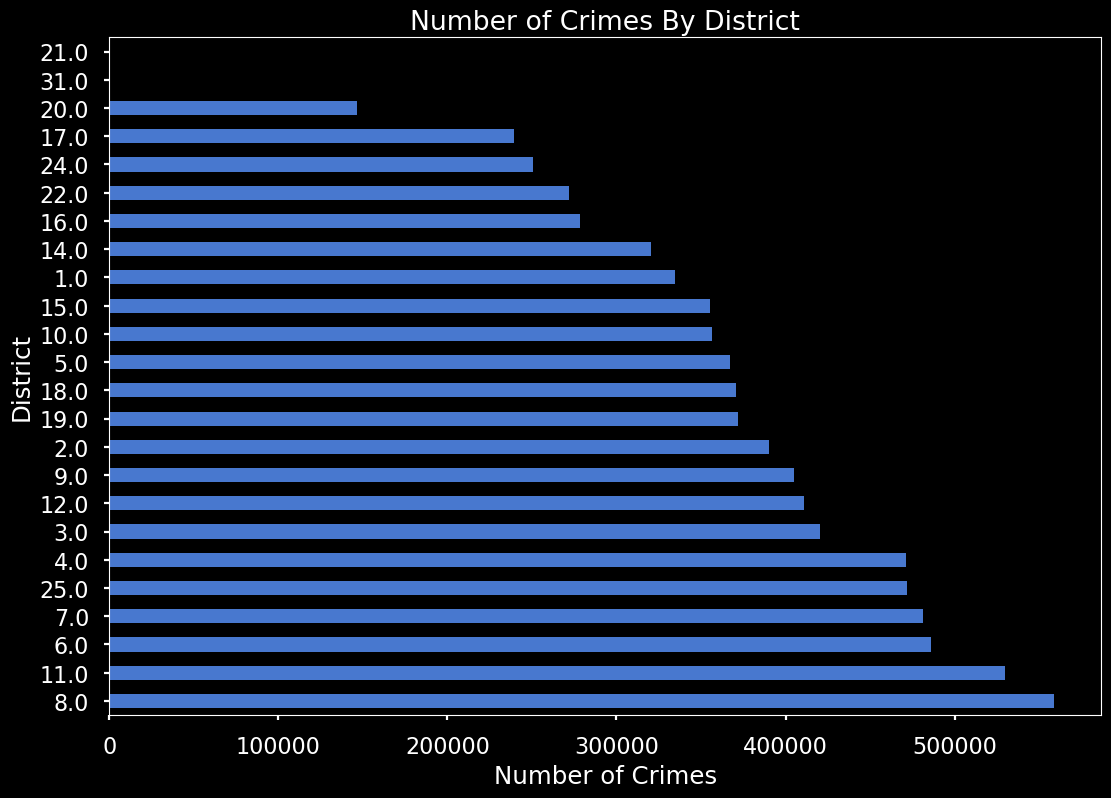

In [9]:
ax = df["District"].value_counts().plot(kind = "barh")
ax.set_title("Number of Crimes By District")
ax.set_ylabel("District")
ax.set_xlabel("Number of Crimes")

In [10]:
df_11 = df["District"] == 8
df[df_11].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558866 entries, 8 to 149049
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    558866 non-null  int64  
 1   Date                  558866 non-null  object 
 2   Primary Type          558866 non-null  object 
 3   Description           558866 non-null  object 
 4   Location Description  558502 non-null  object 
 5   Arrest                558866 non-null  bool   
 6   Domestic              558866 non-null  bool   
 7   Beat                  558866 non-null  int64  
 8   District              558866 non-null  float64
 9   Ward                  519502 non-null  float64
 10  Latitude              553567 non-null  float64
 11  Longitude             553567 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 48.0+ MB


In [11]:
df_31 = df["District"] == 21
df[df_31].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 257519 to 273313
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    4 non-null      int64  
 1   Date                  4 non-null      object 
 2   Primary Type          4 non-null      object 
 3   Description           4 non-null      object 
 4   Location Description  4 non-null      object 
 5   Arrest                4 non-null      bool   
 6   Domestic              4 non-null      bool   
 7   Beat                  4 non-null      int64  
 8   District              4 non-null      float64
 9   Ward                  4 non-null      float64
 10  Latitude              4 non-null      float64
 11  Longitude             4 non-null      float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 360.0+ bytes


Based on the above graph, we can see that the district with the most crime is District 8 while the district with the least crime is District 21. The graph actually depicts such a small number of crimes that I had to double check that the number of crimes was being properly read above.

# Annual Crime Trends

* Is the total number of crimes increasing or decreasing across the years?
* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [12]:
time = df.copy()
time["Date"] = pd.to_datetime(time['Date'])
time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8288872 entries, 0 to 149053
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 711.4+ MB


In [13]:
time = time.set_index('Date')

In [14]:
time["Crime"] = True

In [15]:
ts = time.groupby("Primary Type").resample("Y").sum()
ts

ID  Arrest  Domestic     Beat  \
Primary Type      Date                                                  
ARSON             2001-12-31    1635830865     181        59  1247579   
                  2002-12-31    2288357434     156        71  1287303   
                  2003-12-31    2703076345     140        53  1128192   
                  2004-12-31    2646181864     109        37   992253   
                  2005-12-31    2850867321     121        39   843632   
...                                    ...     ...       ...      ...   
WEAPONS VIOLATION 2019-12-31   74471980828    4223        16  6100494   
                  2020-12-31  102154848702    5449        19  8108066   
                  2021-12-31  111493649779    5560        49  8995601   
                  2022-12-31  111794336592    5390        62  8720245   
                  2023-12-31   68302565612    3108        18  5025474   

                              District      Ward       Latitude  \
Primary Type      Date                                            
ARSON             2001-12-31   11870.0     103.0   42047.307400   
                  2002-12-31   12169.0   15924.0   40922.433732   
                  2003-12-31   10627.0   19981.0   39863.754410   
                  2004-12-31    9509.0   17373.0   32384.111791   
                  2005-12-31    7930.0   15043.0   28785.106692   
...                                ...       ...            ...   
WEAPONS VIOLATION 2019-12-31   59551.0  122194.0  264977.937719   
                  2020-12-31   79120.0  163732.0  351911.729617   
                  2021-12-31   87874.0  180363.0  374011.308683   
                  2022-12-31   85167.0  173006.0  363655.712159   
                  2023-12-31   49015.0   98927.0  218757.986930   

                                  Longitude  Crime  
Primary Type      Date                              
ARSON             2001-12-31  -88118.160187   1011  
                  2002-12-31  -85752.010876   1032  
                  2003-12-31  -83554.299139    955  
                  2004-12-31  -67867.324658    778  
                  2005-12-31  -60323.991343    691  
...                                     ...    ...  
WEAPONS VIOLATION 2019-12-31 -555625.593886   6339  
                  2020-12-31 -737889.451103   8432  
                  2021-12-31 -784180.519071   8980  
                  2022-12-31 -762421.053755   8766  
                  2023-12-31 -458659.164011   5233  

[754 rows x 9 columns]

In [16]:
ts = ts.unstack("Primary Type")
ts.head(3)

ID                                            \
Primary Type         ARSON       ASSAULT       BATTERY      BURGLARY   
Date                                                                   
2001-12-31    1.635831e+09  5.086238e+10  1.516368e+11  4.263932e+10   
2002-12-31    2.288357e+09  7.019623e+10  2.097613e+11  5.742773e+10   
2003-12-31    2.703076e+09  8.326301e+10  2.495057e+11  7.122495e+10   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-12-31                          12359785.0        3.261870e+09   
2002-12-31                                 0.0        4.433151e+09   
2003-12-31                                 0.0        4.759067e+09   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-12-31      9.089868e+10             171087772.0      2.139709e+10   
2002-12-31      1.246088e+11             102502075.0      3.087156e+10   
2003-12-31      1.555016e+11             273923726.0      4.181036e+10   

                                 ...         Crime               \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-12-31         2.576917e+10  ...       29662.0       6026.0   
2002-12-31         3.166952e+10  ...       32600.0       6408.0   
2003-12-31         3.898771e+10  ...       31147.0       6214.0   

                                                                         \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM  ROBBERY   
Date                                                                      
2001-12-31                9.0                 2750.0       8.0  18441.0   
2002-12-31                8.0                 2457.0       2.0  18523.0   
2003-12-31                6.0                 2430.0       2.0  17332.0   

                                                              
Primary Type SEX OFFENSE STALKING    THEFT WEAPONS VIOLATION  
Date                                                          
2001-12-31        2239.0    204.0  99277.0            4277.0  
2002-12-31        2173.0    200.0  98332.0            4281.0  
2003-12-31        2078.0    247.0  98876.0            4211.0  

[3 rows x 324 columns]

Text(0.5, 1.0, 'Yearly Arsons In Chicago')

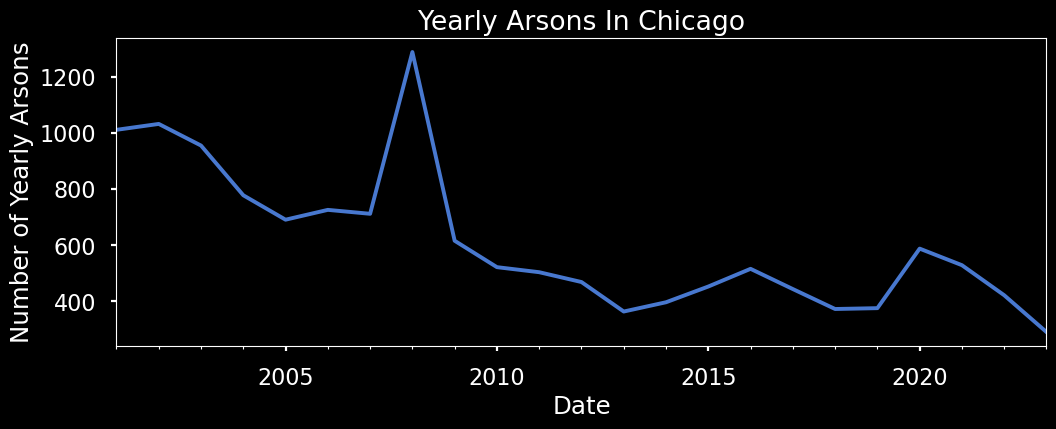

In [17]:
ax = ts["Crime"]["ARSON"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Arsons")
ax.set_xlabel("Date")
ax.set_title("Yearly Arsons In Chicago")

Text(0.5, 1.0, 'Yearly Thefts In Chicago')

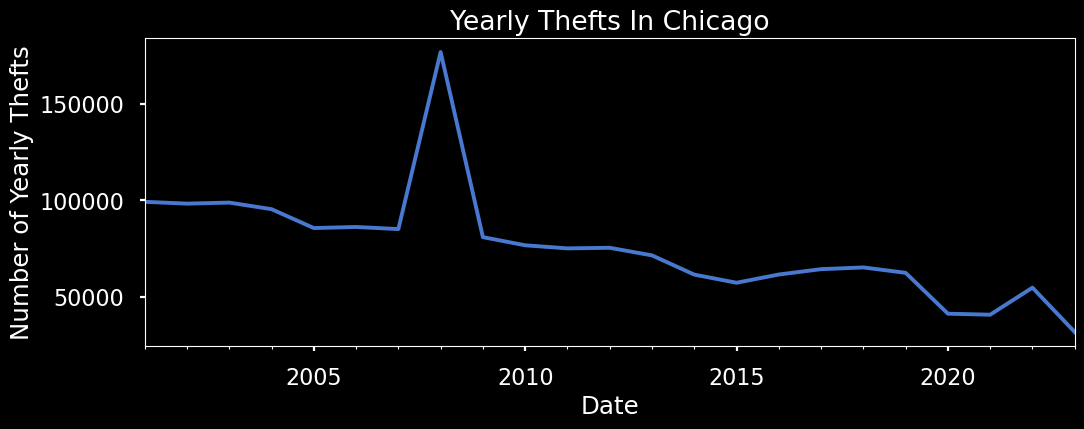

In [18]:
ax = ts["Crime"]["THEFT"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Thefts")
ax.set_xlabel("Date")
ax.set_title("Yearly Thefts In Chicago")

Text(0.5, 1.0, 'Yearly Homicides In Chicago')

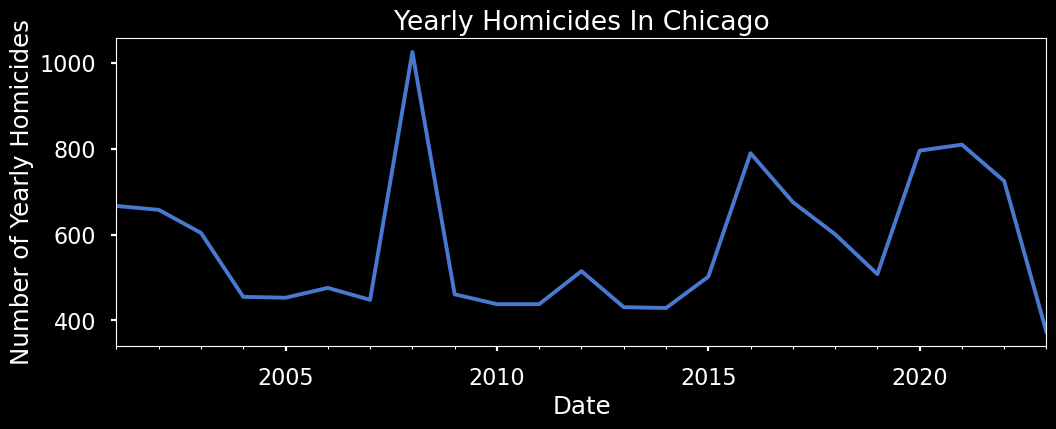

In [19]:
ax = ts["Crime"]["HOMICIDE"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Homicides")
ax.set_xlabel("Date")
ax.set_title("Yearly Homicides In Chicago")

Text(0.5, 1.0, 'Yearly Burglaries In Chicago')

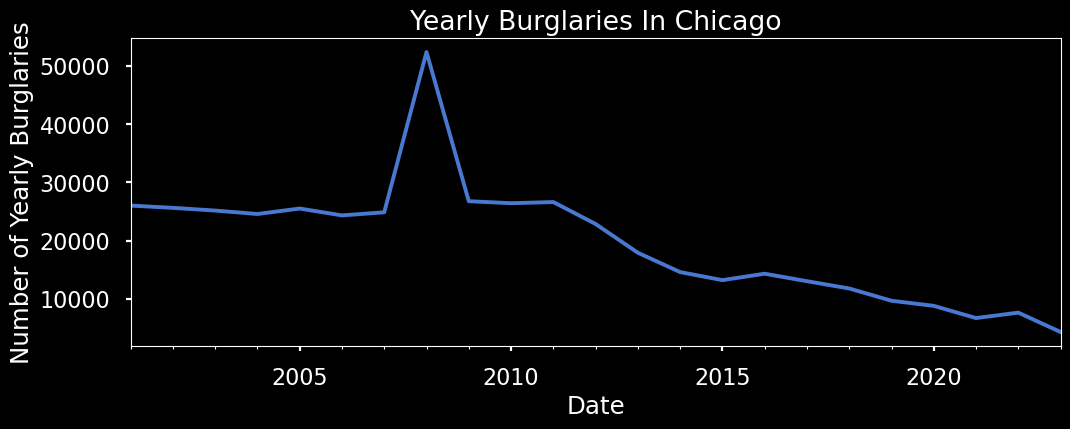

In [20]:
ax = ts["Crime"]["BURGLARY"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Burglaries")
ax.set_xlabel("Date")
ax.set_title("Yearly Burglaries In Chicago")

Text(0.5, 1.0, 'Yearly Assaults In Chicago')

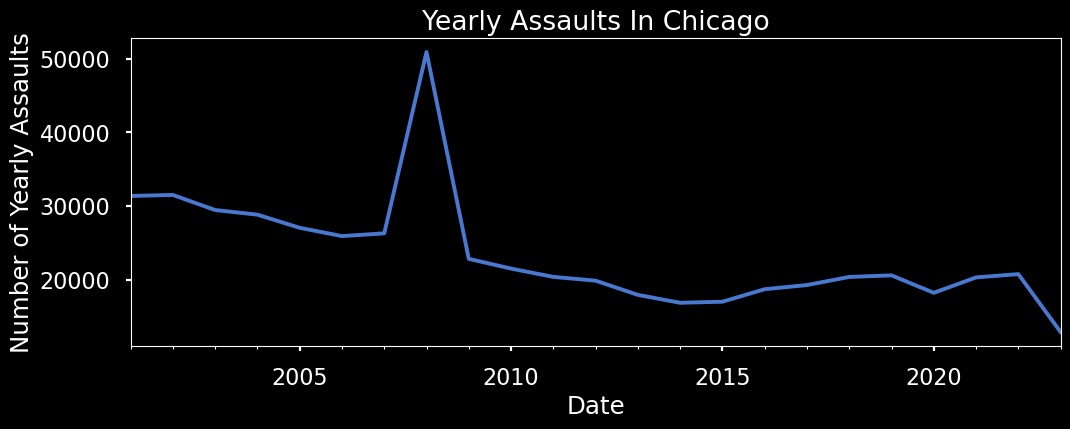

In [21]:
ax = ts["Crime"]["ASSAULT"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Assaults")
ax.set_xlabel("Date")
ax.set_title("Yearly Assaults In Chicago")

Text(0.5, 1.0, 'Yearly Weappons Violations In Chicago')

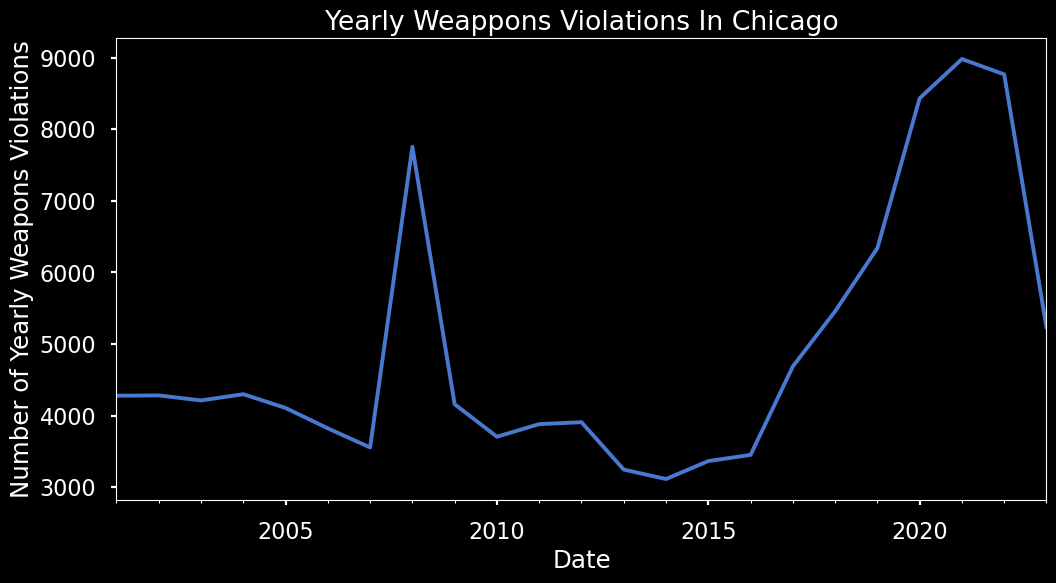

In [22]:
ax = ts["Crime"]["WEAPONS VIOLATION"].plot(figsize=(12,6))
ax.set_ylabel("Number of Yearly Weapons Violations")
ax.set_xlabel("Date")
ax.set_title("Yearly Weappons Violations In Chicago")

In [23]:
ts = time.resample("Y").sum()
ts.head(3)

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime
Date,,,,,,,,,
2001-12-31,795260763880,141934,58731,595888814,5513001.0,100920.0,2.020608e+07,-4.233434e+07,485886
2002-12-31,1089755457499,141564,61208,594515174,5550253.0,7972534.0,1.973106e+07,-4.133988e+07,486807
2003-12-31,1350832774963,141588,53845,577402743,5406770.0,10663194.0,1.975184e+07,-4.138487e+07,475984


Text(0.5, 1.0, 'Yearly Crime In Chicago')

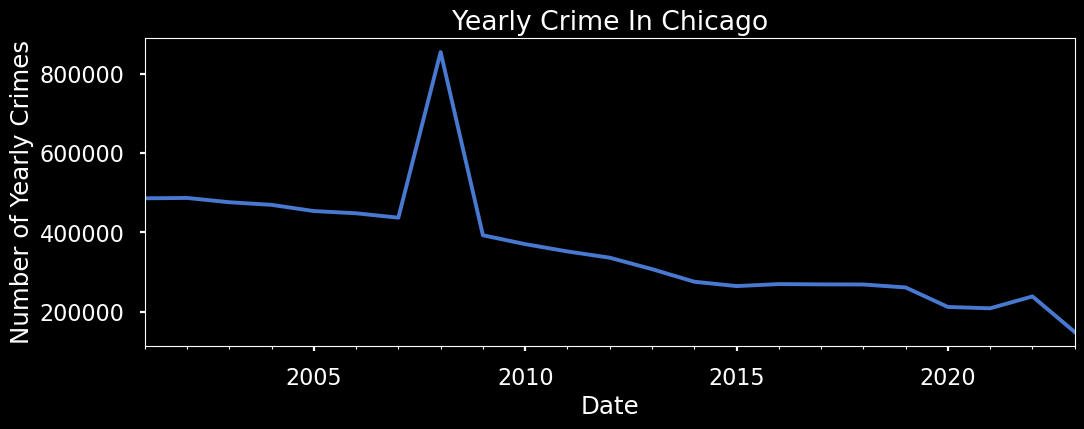

In [24]:
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Crimes")
ax.set_xlabel("Date")
ax.set_title("Yearly Crime In Chicago")

While overall crime in Chicago is declining slightly over time, certain crimes types do not follow this trend. Homicides and weapons violations have increased massively while overall crime has declined. There is clearly a major increase in gun crime in particular.

# Monthly Crime Trends

* What months have the most crime? What months have the least?
* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [25]:
ts = time.groupby("Primary Type").resample("M").sum()
ts = ts.unstack("Primary Type")
ts.head(3)

ID                                            \
Primary Type        ARSON       ASSAULT       BATTERY      BURGLARY   
Date                                                                  
2001-01-31     89843098.0  2.862602e+09  8.783277e+09  2.600415e+09   
2001-02-28     78745628.0  2.813532e+09  8.407601e+09  2.312324e+09   
2001-03-31    132751797.0  4.051710e+09  1.102984e+10  2.626386e+09   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-01-31                                 NaN         336247166.0   
2001-02-28                                 NaN         196968724.0   
2001-03-31                                 NaN         226219757.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-01-31      5.322145e+09              36927305.0      1.611806e+09   
2001-02-28      5.097746e+09               1377952.0      1.474270e+09   
2001-03-31      6.645765e+09               6226697.0      1.634591e+09   

                                 ...         Crime               \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-01-31         2.185488e+09  ...        2800.0        563.0   
2001-02-28         1.725406e+09  ...        2488.0        426.0   
2001-03-31         1.982892e+09  ...        2836.0        550.0   

                                                                        \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM ROBBERY   
Date                                                                     
2001-01-31                NaN                  161.0       2.0  1396.0   
2001-02-28                1.0                  173.0       0.0  1159.0   
2001-03-31                0.0                  267.0       2.0  1399.0   

                                                             
Primary Type SEX OFFENSE STALKING   THEFT WEAPONS VIOLATION  
Date                                                         
2001-01-31         218.0     26.0  7867.0             337.0  
2001-02-28         149.0     13.0  6669.0             301.0  
2001-03-31         184.0     17.0  7766.0             345.0  

[3 rows x 324 columns]

Text(0.5, 1.0, 'Monthly Thefts In Chicago')

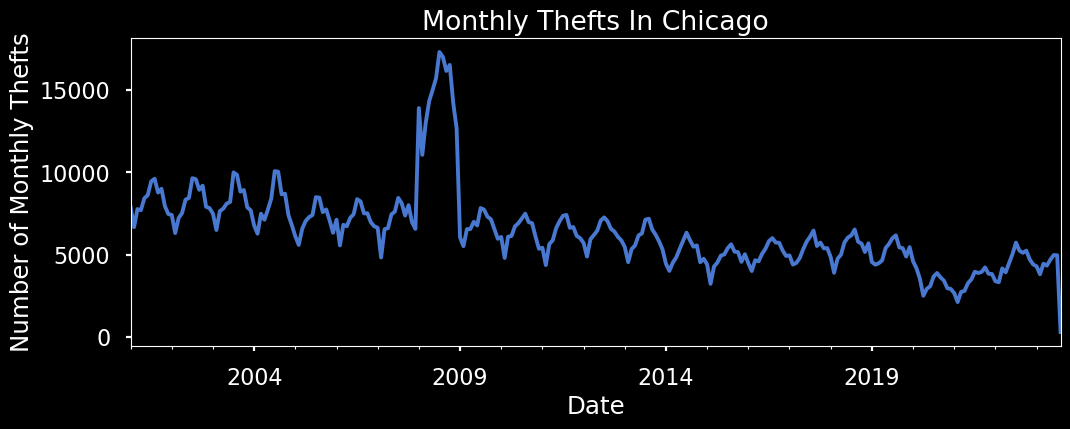

In [26]:
ax = ts["Crime"]["THEFT"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_xlabel("Date")
ax.set_title("Monthly Thefts In Chicago")

At a glance, thefts have a very apparent yearly seasonal trend. We will take a look at a couple of individual years.

Text(0.5, 1.0, 'Monthly Thefts In Chicago In 2022')

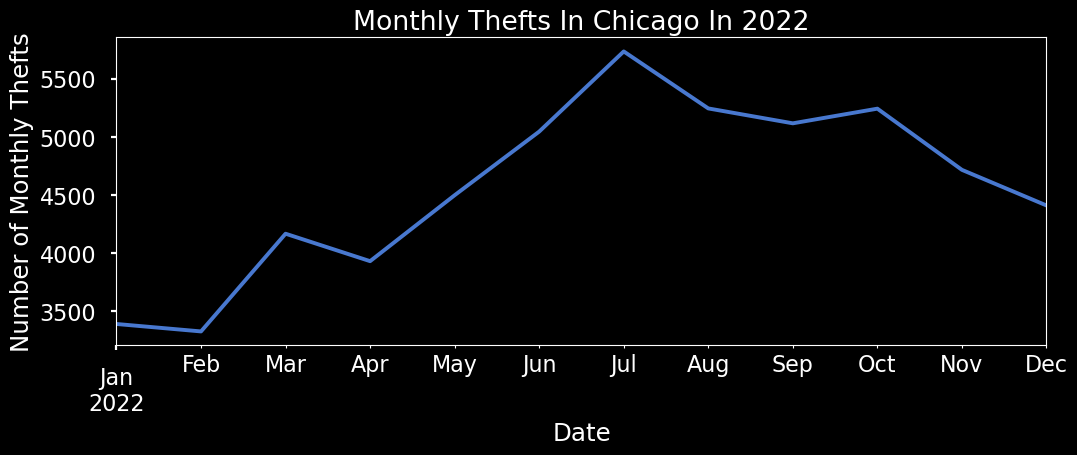

In [27]:
ax = ts["Crime"]["THEFT"]["2022"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_xlabel("Date")
ax.set_title("Monthly Thefts In Chicago In 2022")

Text(0.5, 1.0, 'Monthly Thefts In Chicago In 2008')

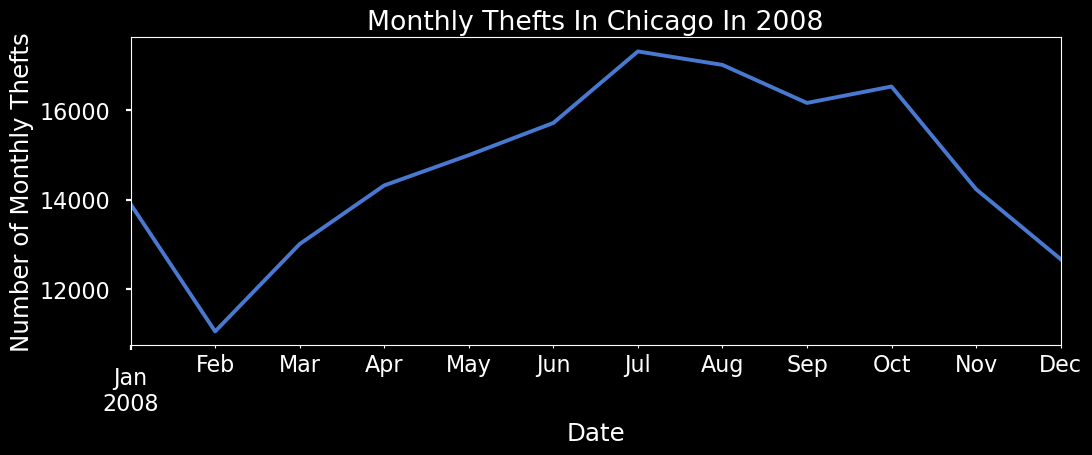

In [28]:
ax = ts["Crime"]["THEFT"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_xlabel("Date")
ax.set_title("Monthly Thefts In Chicago In 2008")

Text(0.5, 1.0, 'Monthly Thefts In Chicago In 2001')

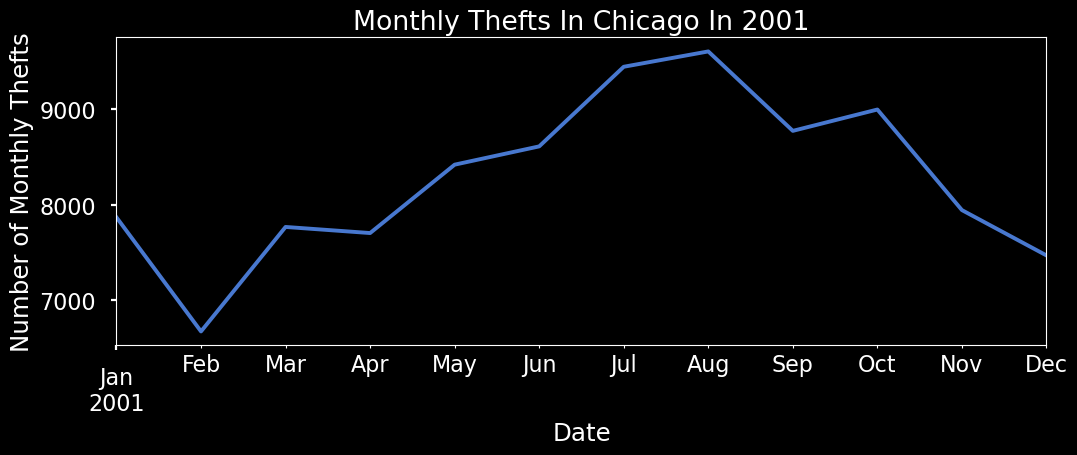

In [29]:
ax = ts["Crime"]["THEFT"]["2001"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_xlabel("Date")
ax.set_title("Monthly Thefts In Chicago In 2001")

We can see a very obvious trend in thefts in which July and August represent the months involving the most theft while February has the least number of thefts. Temperature likely plays a significant role in the trends of criminal activity.

Text(0.5, 1.0, 'Monthly Homicides In Chicago')

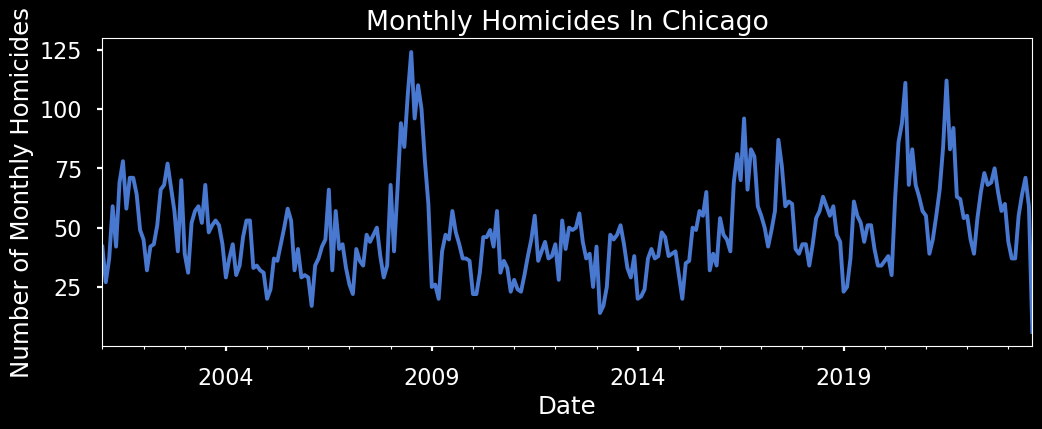

In [30]:
ax = ts["Crime"]["HOMICIDE"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Homicides")
ax.set_xlabel("Date")
ax.set_title("Monthly Homicides In Chicago")

The seasonal trend is somewhat apparent with regard to homicides. I will examine this further.

Text(0.5, 1.0, 'Monthly Homicides In Chicago In 2022')

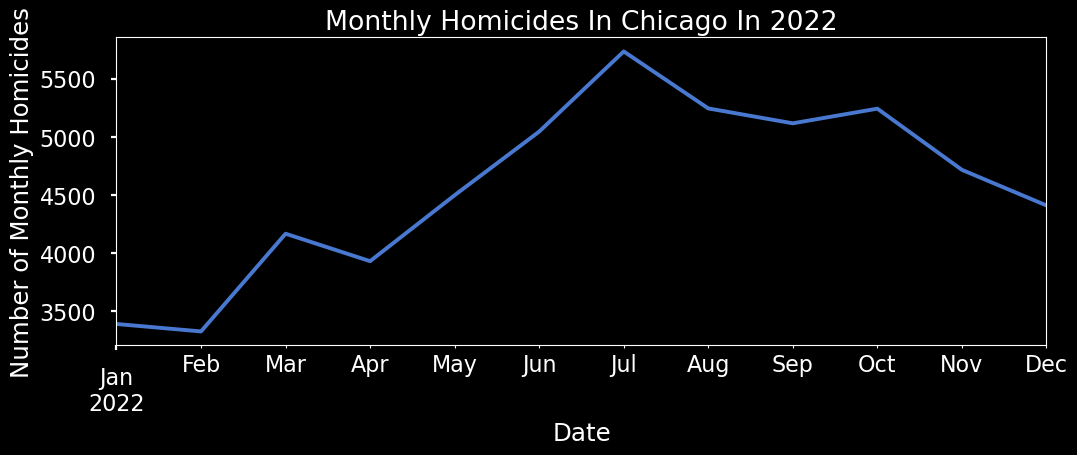

In [31]:
ax = ts["Crime"]["THEFT"]["2022"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Homicides")
ax.set_xlabel("Date")
ax.set_title("Monthly Homicides In Chicago In 2022")

Text(0.5, 1.0, 'Monthly Homicides In Chicago In 2008')

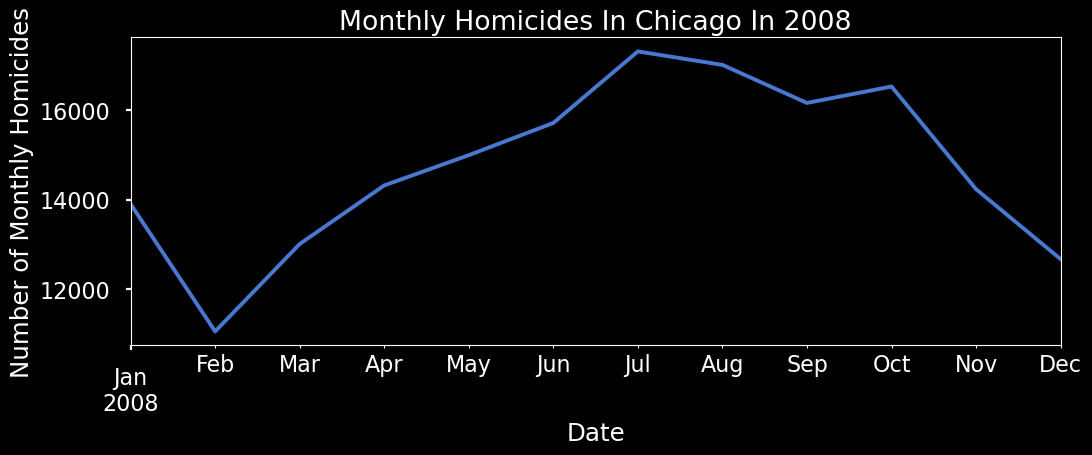

In [32]:
ax = ts["Crime"]["THEFT"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Homicides")
ax.set_xlabel("Date")
ax.set_title("Monthly Homicides In Chicago In 2008")

Text(0.5, 1.0, 'Monthly Homicides In Chicago In 2001')

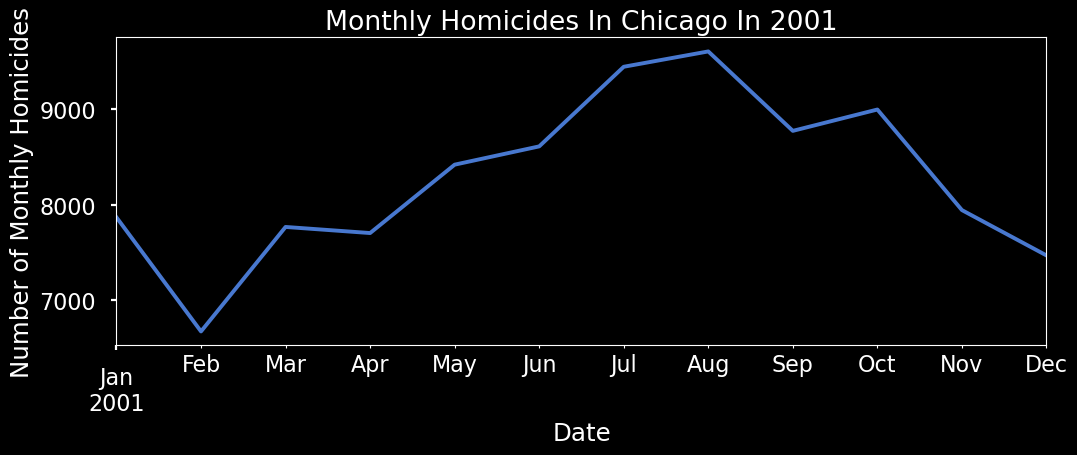

In [33]:
ax = ts["Crime"]["THEFT"]["2001"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Homicides")
ax.set_xlabel("Date")
ax.set_title("Monthly Homicides In Chicago In 2001")

Similar trends can be seen within homicides seasonally. July and August are by far the most common months for homicides while Fedruary is the lowest month for homicides.

Text(0.5, 1.0, 'Monthly Assaults In Chicago')

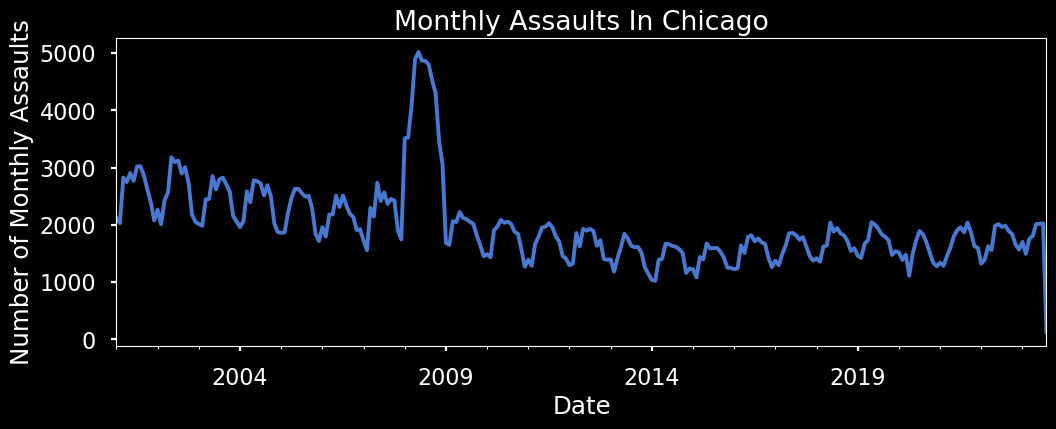

In [34]:
ax = ts["Crime"]["ASSAULT"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago")

Text(0.5, 1.0, 'Monthly Assaults In Chicago In 2022')

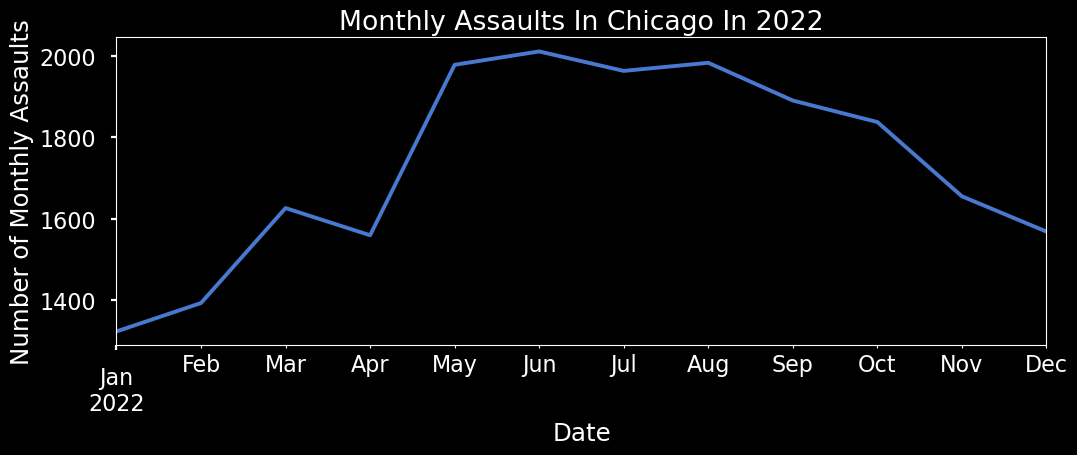

In [35]:
ax = ts["Crime"]["ASSAULT"]["2022"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago In 2022")

Text(0.5, 1.0, 'Monthly Assaults In Chicago In 2008')

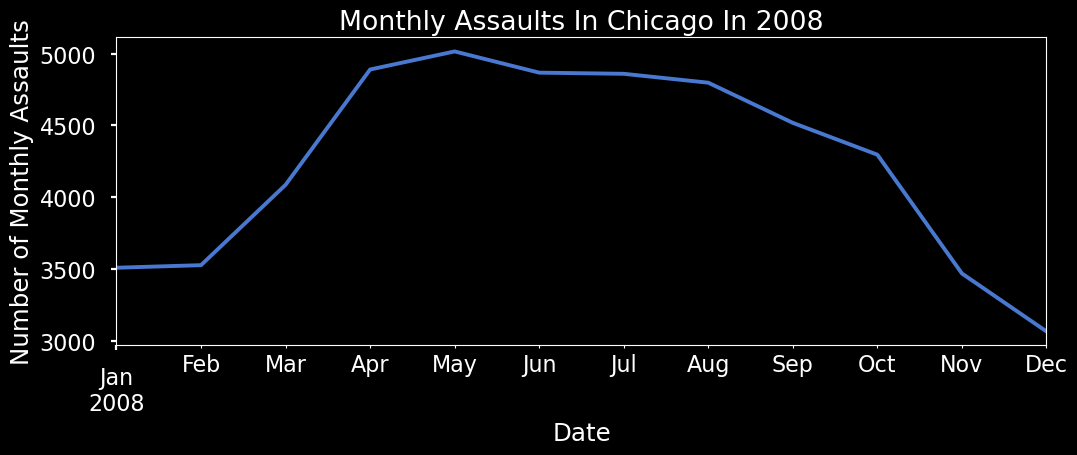

In [36]:
ax = ts["Crime"]["ASSAULT"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago In 2008")

Text(0.5, 1.0, 'Monthly Assaults In Chicago In 2001')

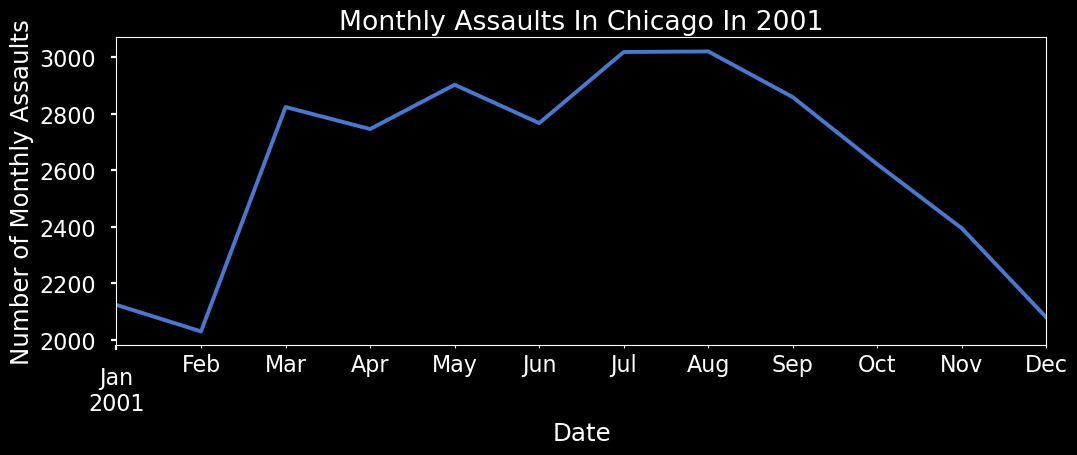

In [37]:
ax = ts["Crime"]["ASSAULT"]["2001"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago In 2001")

The largest spikes in assaults trend seasonally but the trend is somewhat different. The increase in assaults takes place around May and June as opposed to July and August. Though, July and August still represeng months with high amountys of assaults. February meanwhile has a fairly low number of assaults.

In [38]:
ts = time.resample("M").sum()
ts.head(3)

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime
Date,,,,,,,,,
2001-01-31,53200846084,12240,4720,47122656,432641.0,11834.0,1.584035e+06,-3.318611e+06,38119
2001-02-28,47328379904,10964,4243,41477643,383543.0,4976.0,1.406387e+06,-2.946467e+06,33787
2001-03-31,58682275359,12492,5080,49419697,457149.0,5273.0,1.688031e+06,-3.536572e+06,40566


Text(0.5, 1.0, 'Monthly Crimes In Chicago')

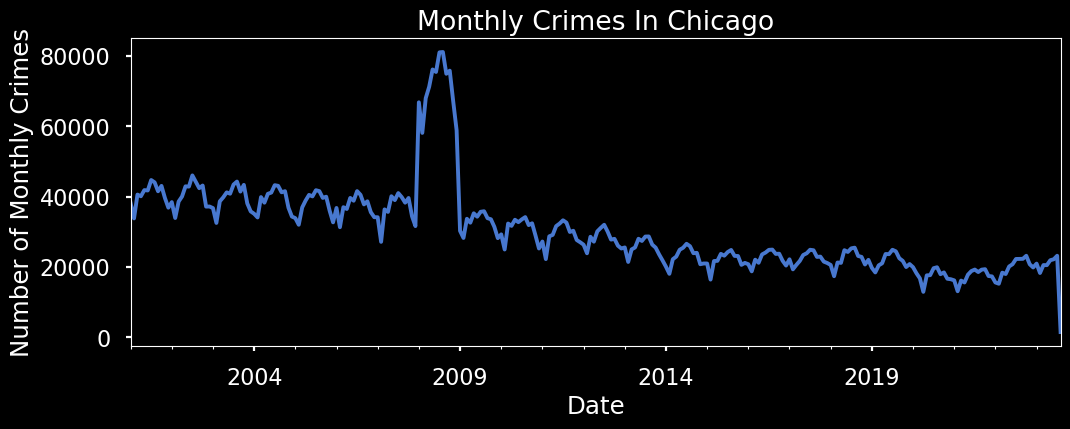

In [39]:
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_xlabel("Date")
ax.set_title("Monthly Crimes In Chicago")

Text(0.5, 1.0, 'Monthly Crimes In Chicago In 2022')

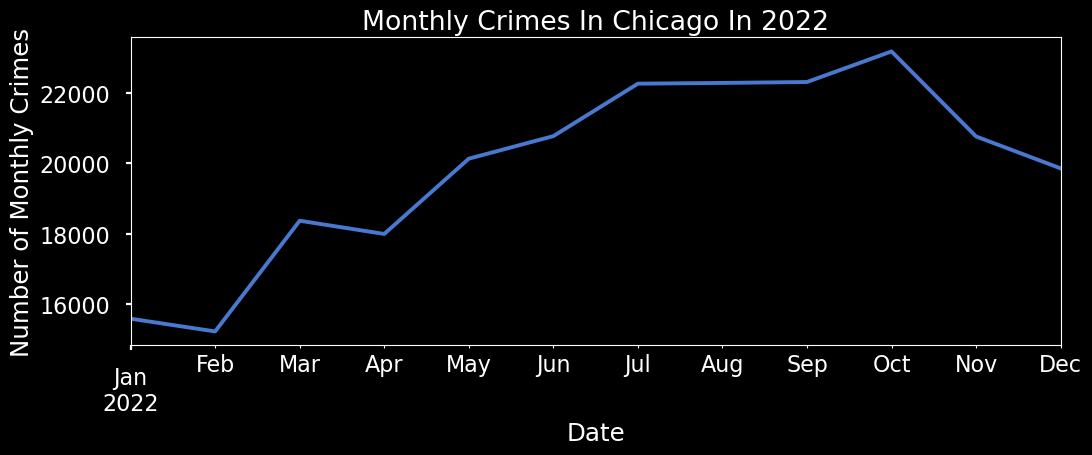

In [40]:
ax = ts["Crime"]["2022"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_xlabel("Date")
ax.set_title("Monthly Crimes In Chicago In 2022")

Text(0.5, 1.0, 'Monthly Crimes In Chicago In 2008')

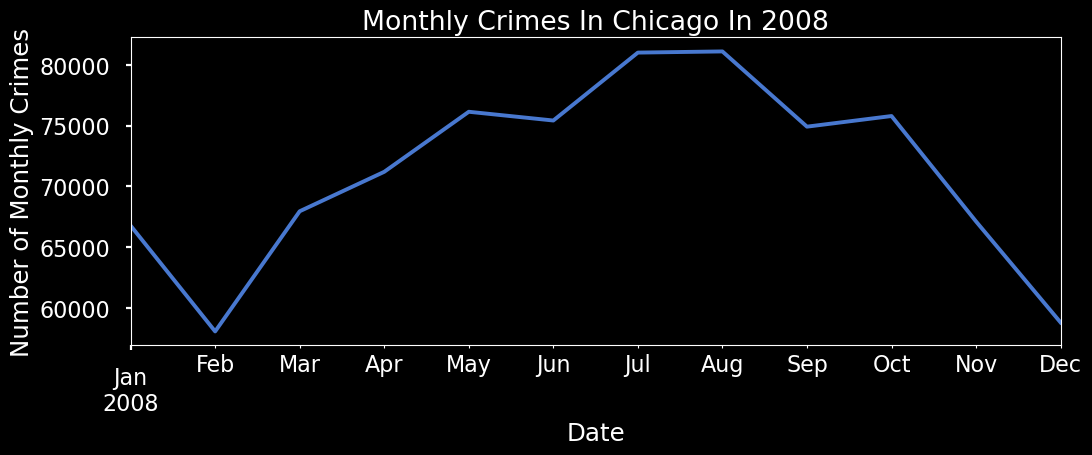

In [41]:
ax = ts["Crime"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_xlabel("Date")
ax.set_title("Monthly Crimes In Chicago In 2008")

Text(0.5, 1.0, 'Monthly Crimes In Chicago In 2001')

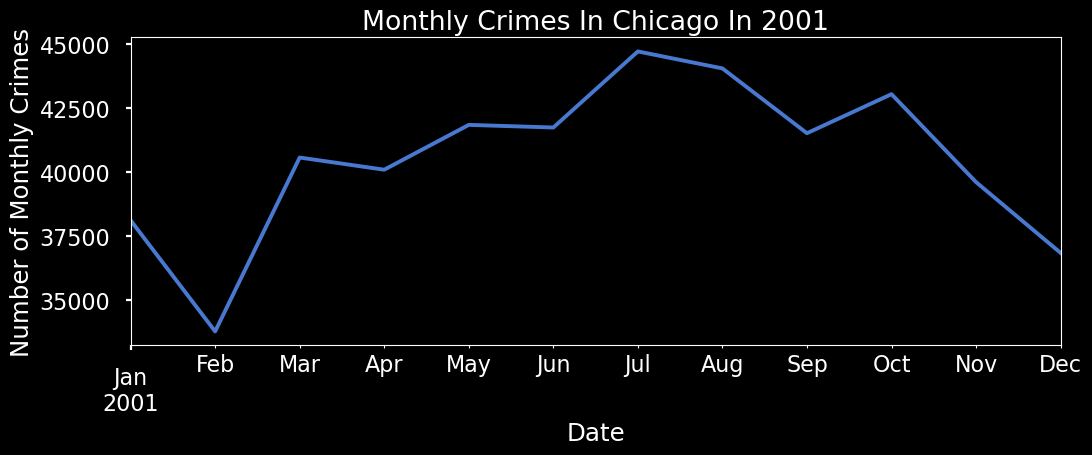

In [42]:
ax = ts["Crime"]["2001"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_xlabel("Date")
ax.set_title("Monthly Crimes In Chicago In 2001")

Overall, major decreases in crime seem to occur around February in Chicago. The highest crime rates generally occur during late Spring and Early Fall. 

In [43]:
ts = time.resample("M").sum()
ts

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime
Date,,,,,,,,,
2001-01-31,53200846084,12240,4720,47122656,432641.0,11834.0,1.584035e+06,-3.318611e+06,38119
2001-02-28,47328379904,10964,4243,41477643,383543.0,4976.0,1.406387e+06,-2.946467e+06,33787
2001-03-31,58682275359,12492,5080,49419697,457149.0,5273.0,1.688031e+06,-3.536572e+06,40566
2001-04-30,60042607479,11870,5149,48728530,450095.0,6395.0,1.667582e+06,-3.493858e+06,40091
2001-05-31,64849925347,12059,5418,50898734,471453.0,6061.0,1.739831e+06,-3.645265e+06,41839
...,...,...,...,...,...,...,...,...,...
2023-04-30,266928125662,2338,3687,23544797,230742.0,470928.0,8.551709e+05,-1.791681e+06,20515
2023-05-31,285729524129,2475,3820,25283200,247807.0,504013.0,9.126415e+05,-1.912069e+06,21912
2023-06-30,289908709038,2505,3879,25467753,249594.0,513418.0,9.224577e+05,-1.932566e+06,22183


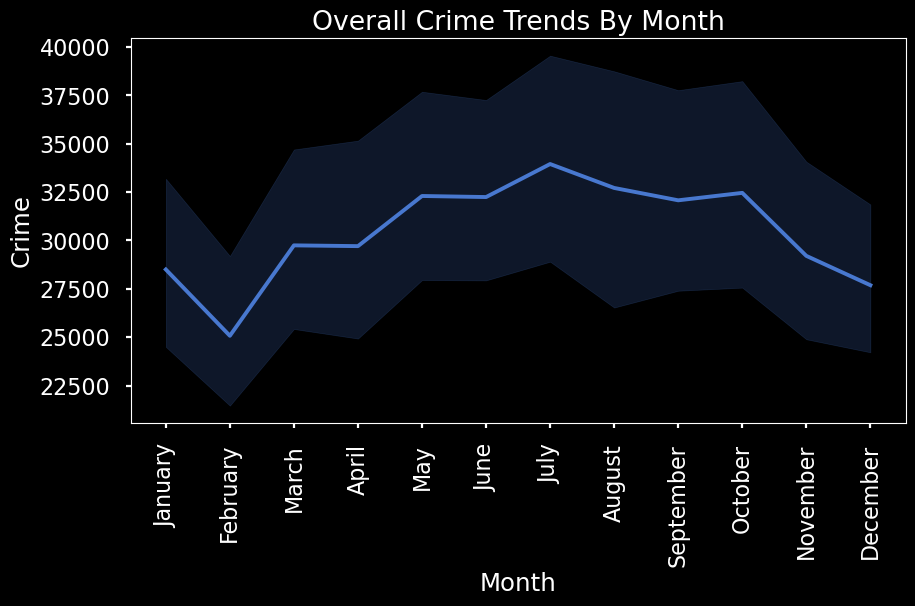

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(
    x= ts.index.month_name(),
    y="Crime",
    data=ts);
ax.set_title("Overall Crime Trends By Month")
ax.set_xlabel("Month")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

The highest month in terms of overall crime rates is July.